In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


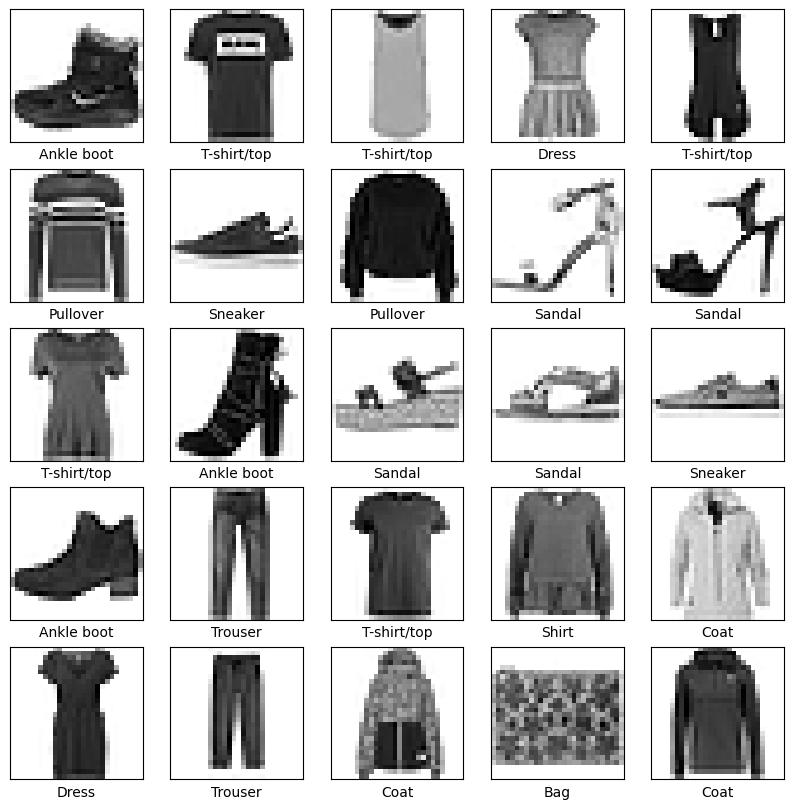

In [3]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = [ "T-shirt/top" , "Trouser" , "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" , "Ankle boot" ]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [4]:
X_valid, X_train = X_valid / 255., X_train / 255.
X_test = X_test / 255.

model = keras.models.Sequential([keras.layers.Conv2D(64, 7, activation="relu", padding= "same", input_shape=[28, 28, 1]),
 keras.layers.MaxPooling2D(2),
 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
 keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
 keras.layers.MaxPooling2D(2),
 keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
 keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
 keras.layers.MaxPooling2D(2),
 keras.layers.Flatten(),
 keras.layers.Dense(128, activation="relu"),
 keras.layers.Dense(64, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
 ])
                   
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [5]:
model.compile(loss = "sparse_categorical_crossentropy",
optimizer = "sgd",
metrics = ["accuracy"])

history = model.fit(X_train,
                    y_train,
                    epochs = 10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 133s 77ms/step - loss: 0.9270 - accuracy: 0.6617 - val_loss: 0.5618 - val_accuracy: 0.7928
Epoch 2/10
1719/1719 [==============================] - 147s 86ms/step - loss: 0.5228 - accuracy: 0.8081 - val_loss: 0.4406 - val_accuracy: 0.8344
Epoch 3/10
1016/1719 [================>.............] - ETA: 59s - loss: 0.4404 - accuracy: 0.8371 

KeyboardInterrupt: 

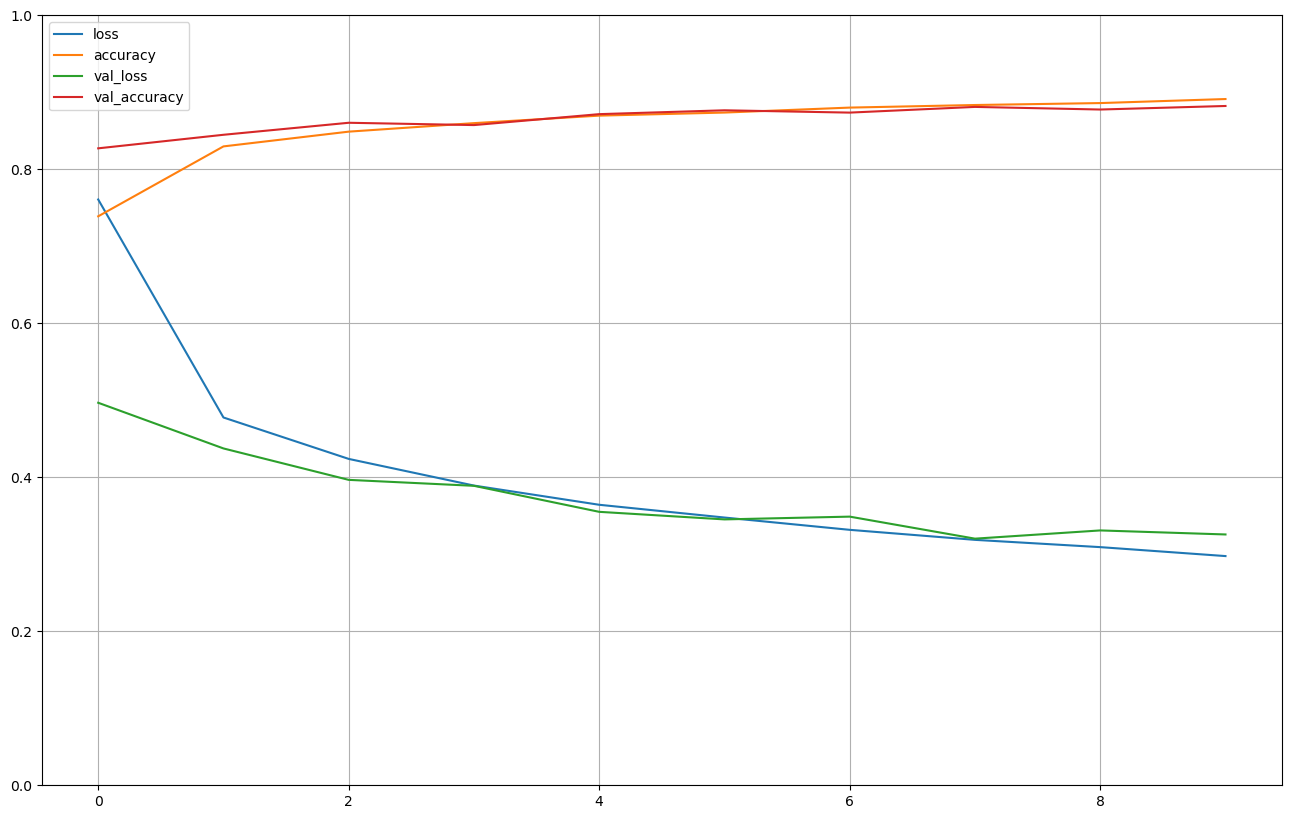

In [30]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
model.evaluate(X_test, y_test)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.